In [1]:
import os, sys, pdb
from pathlib import Path
import pandas as pd
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import time
import copy
import gc
%matplotlib inline
%load_ext autoreload
%autoreload 1
DATA_DIR = Path('../input')
MODEL_DIR = Path('../model')
OUT_DIR = Path('../output')
import warnings
warnings.filterwarnings('ignore')

In [38]:
# DATA_DIR = Path(__file__()).resolve().parent[1] / 'input'
# MODEL_DIR = Path(__file__()).resolve().parent[1] / 'model'
# OUT_DIR = Path(__file__()).resolve().parent[1] / 'output'

In [39]:
ls ../input

lab/  processed/  test_manifest.csv  train_manifest.csv  val_manifest.csv  wav/


In [40]:
ls ../input/lab/

labels_test.arff  labels_test.txt  labels_train_dev.tsv


In [41]:
ls ../input/wav/

devel_0001.wav  devel_0170.wav  test_0159.wav   train_0165.wav  train_0334.wav
devel_0002.wav  devel_0171.wav  test_0160.wav   train_0166.wav  train_0335.wav
devel_0003.wav  devel_0172.wav  test_0161.wav   train_0167.wav  train_0336.wav
devel_0004.wav  devel_0173.wav  test_0162.wav   train_0168.wav  train_0337.wav
devel_0005.wav  devel_0174.wav  test_0163.wav   train_0169.wav  train_0338.wav
devel_0006.wav  devel_0175.wav  train_0001.wav  train_0170.wav  train_0339.wav
devel_0007.wav  devel_0176.wav  train_0002.wav  train_0171.wav  train_0340.wav
devel_0008.wav  devel_0177.wav  train_0003.wav  train_0172.wav  train_0341.wav
devel_0009.wav  devel_0178.wav  train_0004.wav  train_0173.wav  train_0342.wav
devel_0010.wav  devel_0179.wav  train_0005.wav  train_0174.wav  train_0343.wav
devel_0011.wav  devel_0180.wav  train_0006.wav  train_0175.wav  train_0344.wav
devel_0012.wav  test_0001.wav   train_0007.wav  train_0176.wav  train_0345.wav
devel_0013.wav  test_0002.wav   train_0008.wav  trai

In [42]:
train_dev_label = pd.read_csv(DATA_DIR / 'lab' / 'labels_train_dev.tsv', sep='\t')
train_dev_label.head()

,file_name,label
0,train_0001.wav,2
1,train_0002.wav,0
2,train_0003.wav,1
3,train_0004.wav,2
4,train_0005.wav,2


In [43]:
dic = {}
for phase in ['train', 'devel', 'test']:
    dic[phase] = [str(p.resolve()) for p in (DATA_DIR / 'wav').iterdir() if phase in p.name]
    dic[phase].sort()

In [44]:
train = train_dev_label.iloc[:len(dic['train']), :]
train['file_name'] = dic['train']

train.to_csv(DATA_DIR / 'train_manifest.csv', index=False, header=None)

In [45]:
val = train_dev_label.iloc[len(dic['train']):, :]
assert val.shape[0] == len(dic['devel'])
val['file_name'] = dic['devel']

val.to_csv(DATA_DIR / 'val_manifest.csv', index=False, header=None)

In [46]:
test = pd.read_csv(DATA_DIR / 'lab' / 'labels_test.txt', header=None)

In [47]:
test[0] = dic['test']
test.columns = ['file_name', 'label']

In [48]:
test.head()

,file_name,label
0,/home/tomoya/workspace/research/heart-sound-ma...,0
1,/home/tomoya/workspace/research/heart-sound-ma...,2
2,/home/tomoya/workspace/research/heart-sound-ma...,2
3,/home/tomoya/workspace/research/heart-sound-ma...,0
4,/home/tomoya/workspace/research/heart-sound-ma...,2


In [49]:
test.to_csv(DATA_DIR / 'test_manifest.csv', index=False, header=None)

In [50]:
path = train.loc[0, 'file_name']
path

'/home/tomoya/workspace/research/heart-sound-machine/input/wav/train_0001.wav'

In [2]:
from librosa.core import load

In [55]:
wave, sr = load(path, sr=4000)
wave

array([-0.02627563, -0.02386475, -0.01989746, ...,  0.12057495,
        0.11740112,  0.11181641], dtype=float32)

label: 2


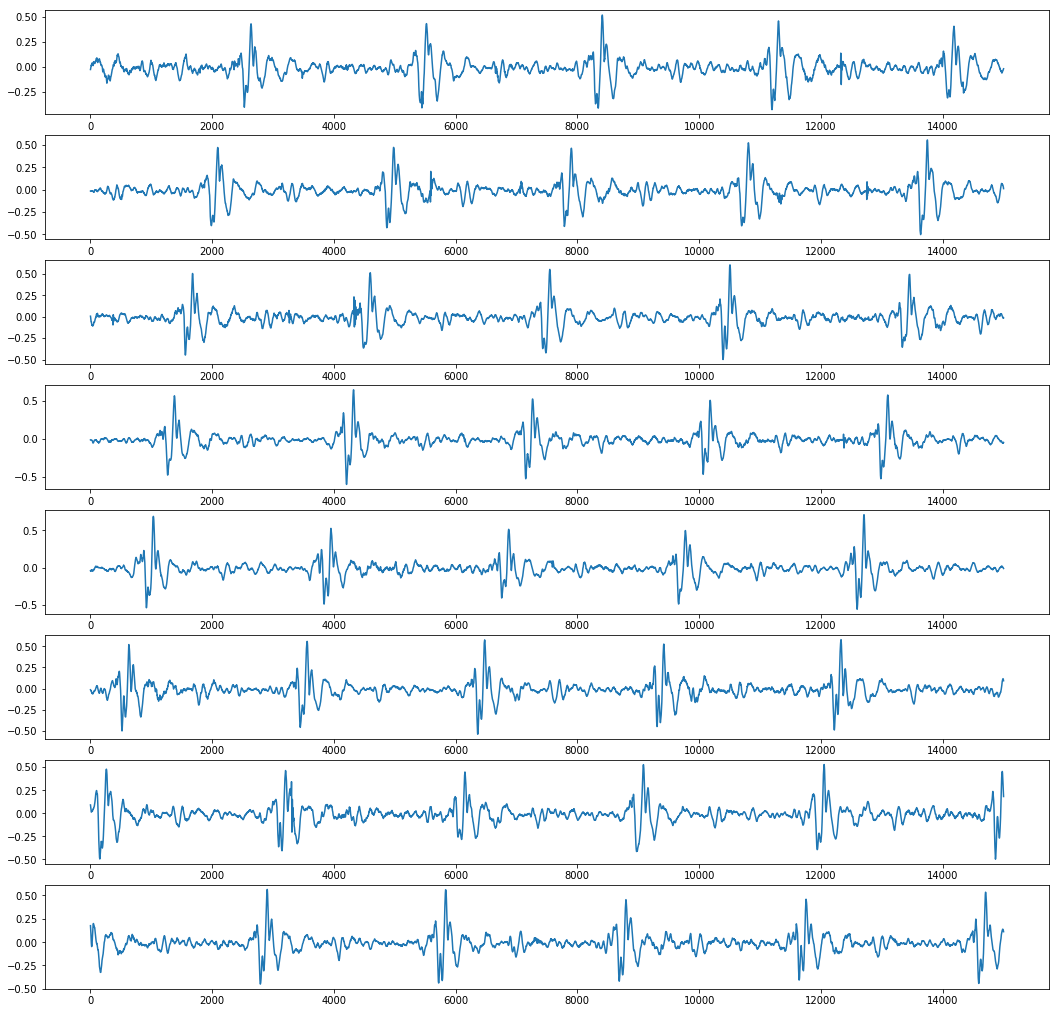

In [69]:
n_split = 8
one_length = wave.shape[0] // n_split
fig, axes = plt.subplots(nrows=n_split, figsize=(18,18))

print(f"label: {train.loc[0, 'label']}")
for i in range(n_split):
    axes[i].plot(wave[i*one_length:(i+1)*one_length])

label: 0


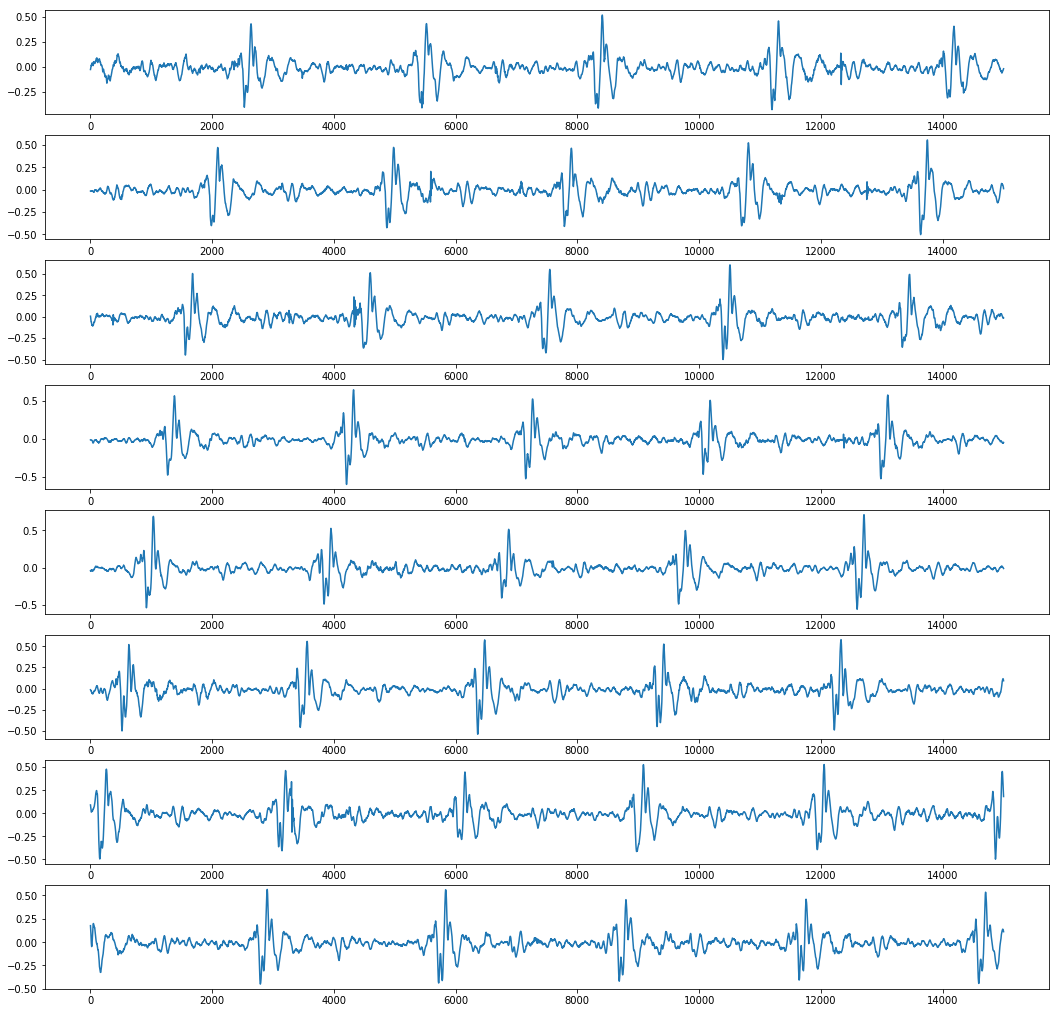

In [88]:
path, label = train.loc[1]
n_split = 8
one_length = wave.shape[0] // n_split
fig, axes = plt.subplots(nrows=n_split, figsize=(18,18))

print(f"label: {label}")
for i in range(n_split):
    axes[i].plot(wave[i*one_length:(i+1)*one_length])

label: 1


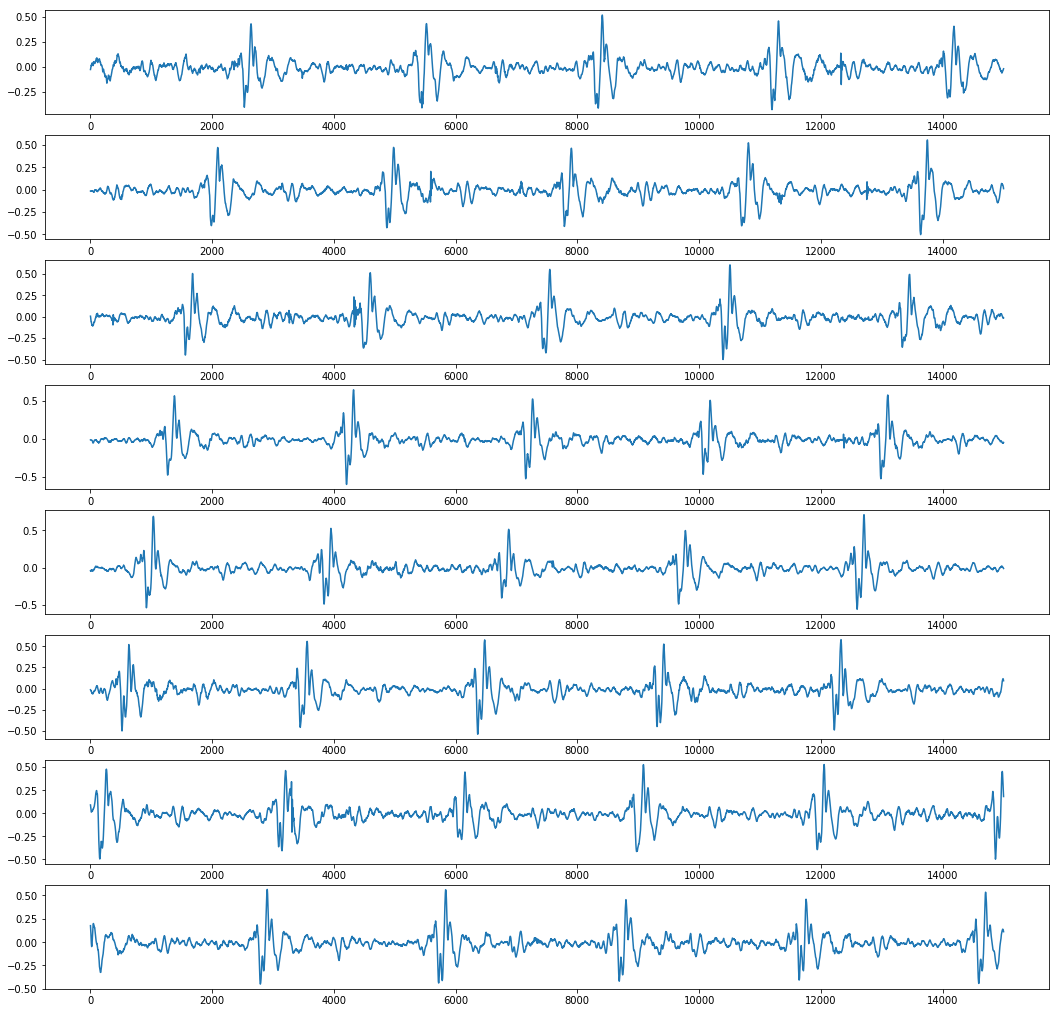

In [87]:
path, label = train.loc[2]
n_split = 8
one_length = wave.shape[0] // n_split
fig, axes = plt.subplots(nrows=n_split, figsize=(18,18))

print(f"label: {label}")
for i in range(n_split):
    axes[i].plot(wave[i*one_length:(i+1)*one_length])

In [89]:
wave.shape

(120032,)

In [3]:
wave, sr = load('/home/tomoya/workspace/research/heart-sound-machine/input/db1-5/train_0001_1.wav', sr=4000)
wave

NoBackendError: 